In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier 

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

## Dataset Load 

In [2]:
train_data = pd.read_csv("train_data.txt", delimiter=':::' ,header = None ,engine='python')
test_data  = pd.read_csv("test_data.txt", delimiter=':::' ,header = None ,engine='python')

test_data_solution  = pd.read_csv("test_data_solution.txt", delimiter=':::' ,header = None ,engine='python')

In [3]:
data = pd.concat((train_data ,test_data_solution))


In [4]:
data.head()

0                                   1           2  \
0  1       Oscar et la dame rose (2009)       drama    
1  2                       Cupid (1997)    thriller    
2  3   Young, Wild and Wonderful (1980)       adult    
3  4              The Secret Sin (1915)       drama    
4  5             The Unrecovered (2007)       drama    

                                                   3  
0   Listening in to a conversation between his do...  
1   A brother and sister with a past incestuous r...  
2   As the bus empties the students for their fie...  
3   To help their unemployed father make ends mee...  
4   The film's title refers not only to the un-re...

In [5]:
data.columns = ['Id','Title','Genre','Description']

In [6]:
data.head()

Id                               Title       Genre  \
0   1       Oscar et la dame rose (2009)       drama    
1   2                       Cupid (1997)    thriller    
2   3   Young, Wild and Wonderful (1980)       adult    
3   4              The Secret Sin (1915)       drama    
4   5             The Unrecovered (2007)       drama    

                                         Description  
0   Listening in to a conversation between his do...  
1   A brother and sister with a past incestuous r...  
2   As the bus empties the students for their fie...  
3   To help their unemployed father make ends mee...  
4   The film's title refers not only to the un-re...

## EDA 

In [7]:
data.isnull().sum()

Id             0
Title          0
Genre          0
Description    0
dtype: int64

In [8]:
data.duplicated().sum()

0

In [9]:
data["Genre"].value_counts()

Genre
 drama           27225
 documentary     26192
 comedy          14893
 short           10145
 horror           4408
 thriller         3181
 action           2629
 western          2064
 reality-tv       1767
 family           1567
 adventure        1550
 music            1462
 romance          1344
 sci-fi           1293
 adult            1180
 crime            1010
 animation         996
 sport             863
 talk-show         782
 fantasy           645
 mystery           637
 musical           553
 biography         529
 history           486
 game-show         387
 news              362
 war               264
Name: count, dtype: int64

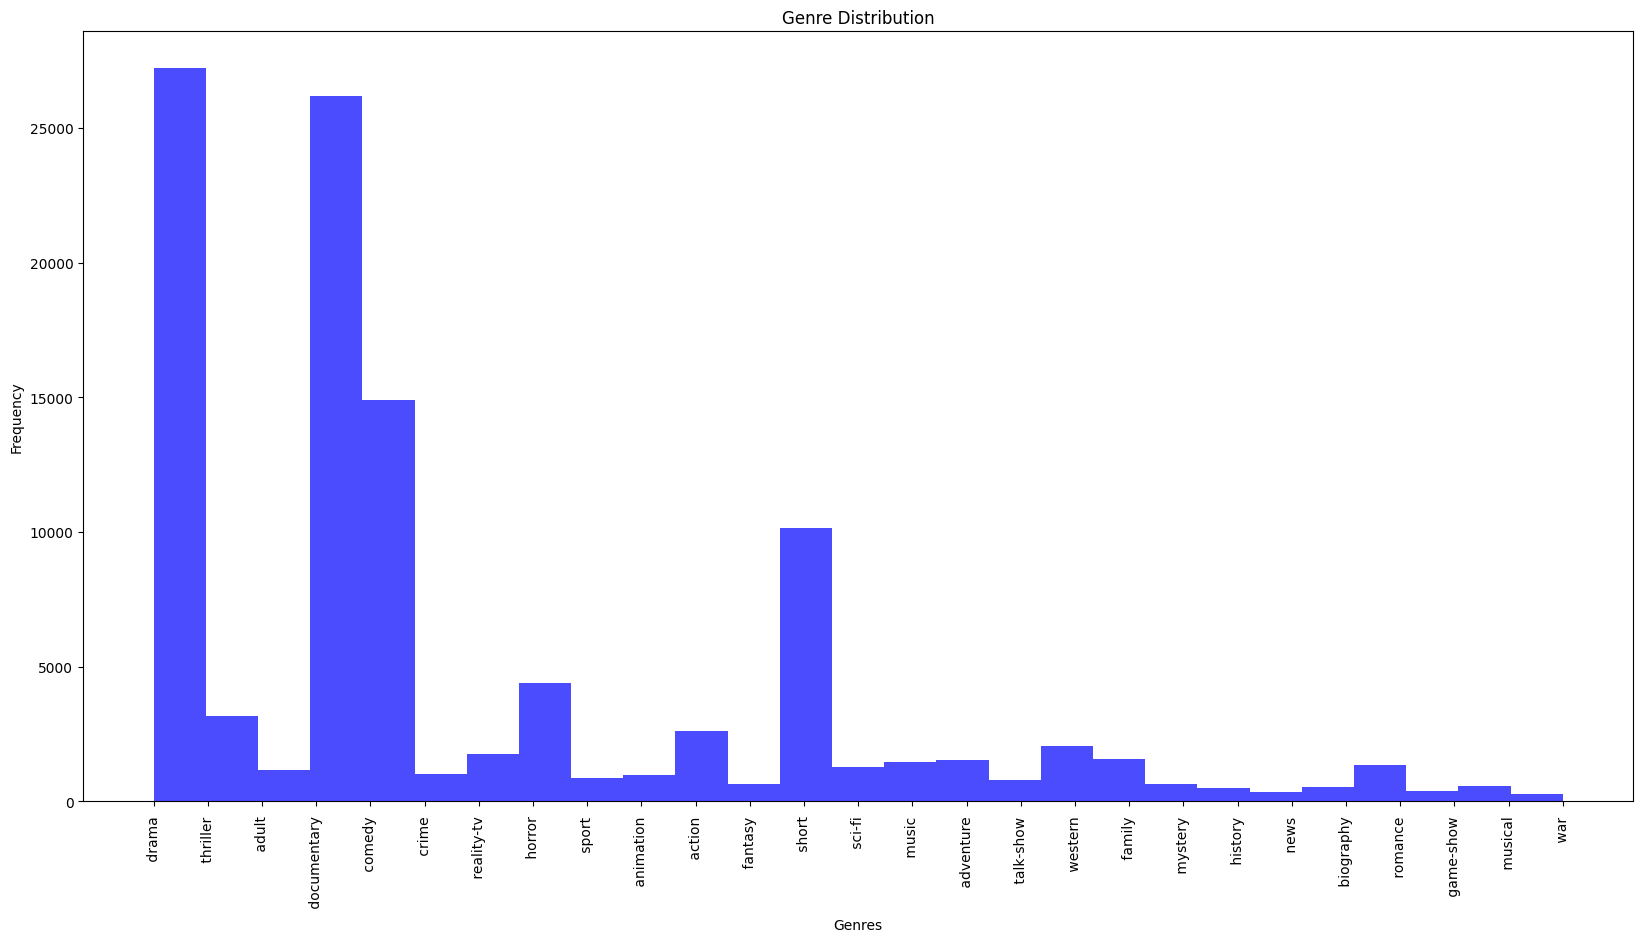

In [10]:
plt.figure(figsize=(20, 10))
plt.hist(data["Genre"],bins =27 , color='blue', alpha=0.7)
plt.title("Genre Distribution")
plt.xlabel("Genres")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.show()

## Pre-Processing 

In [11]:
stopword = set(stopwords.words('english'))

def preprocessing(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove punctuation using regular expressions
    text = re.sub(r'[^\w\s]', '', text)
    
    # Remove specific characters #, @, and $
    text = re.sub(r'[#@\$]', '', text)
    
    # tokenize and convert to list
    tokens = word_tokenize(text)
    
    ## Lemmatize it 
    lemmatizer  = WordNetLemmatizer()
    
    ## lemmatize each token
    text = text.split()
    text = [word for word in text if word not in stopword]
    
    
    return " ".join(text) 
   

In [21]:
data["Despcription_clean"] =  data["Description"].apply(preprocessing)


In [13]:
data.head()

Id                               Title       Genre  \
0   1       Oscar et la dame rose (2009)       drama    
1   2                       Cupid (1997)    thriller    
2   3   Young, Wild and Wonderful (1980)       adult    
3   4              The Secret Sin (1915)       drama    
4   5             The Unrecovered (2007)       drama    

                                         Description  \
0   Listening in to a conversation between his do...   
1   A brother and sister with a past incestuous r...   
2   As the bus empties the students for their fie...   
3   To help their unemployed father make ends mee...   
4   The film's title refers not only to the un-re...   

                                  Despcription_clean  
0  listening conversation doctor parents 10yearol...  
1  brother sister past incestuous relationship cu...  
2  bus empties students field trip museum natural...  
3  help unemployed father make ends meet edith tw...  
4  films title refers unrecovered bodies ground z...

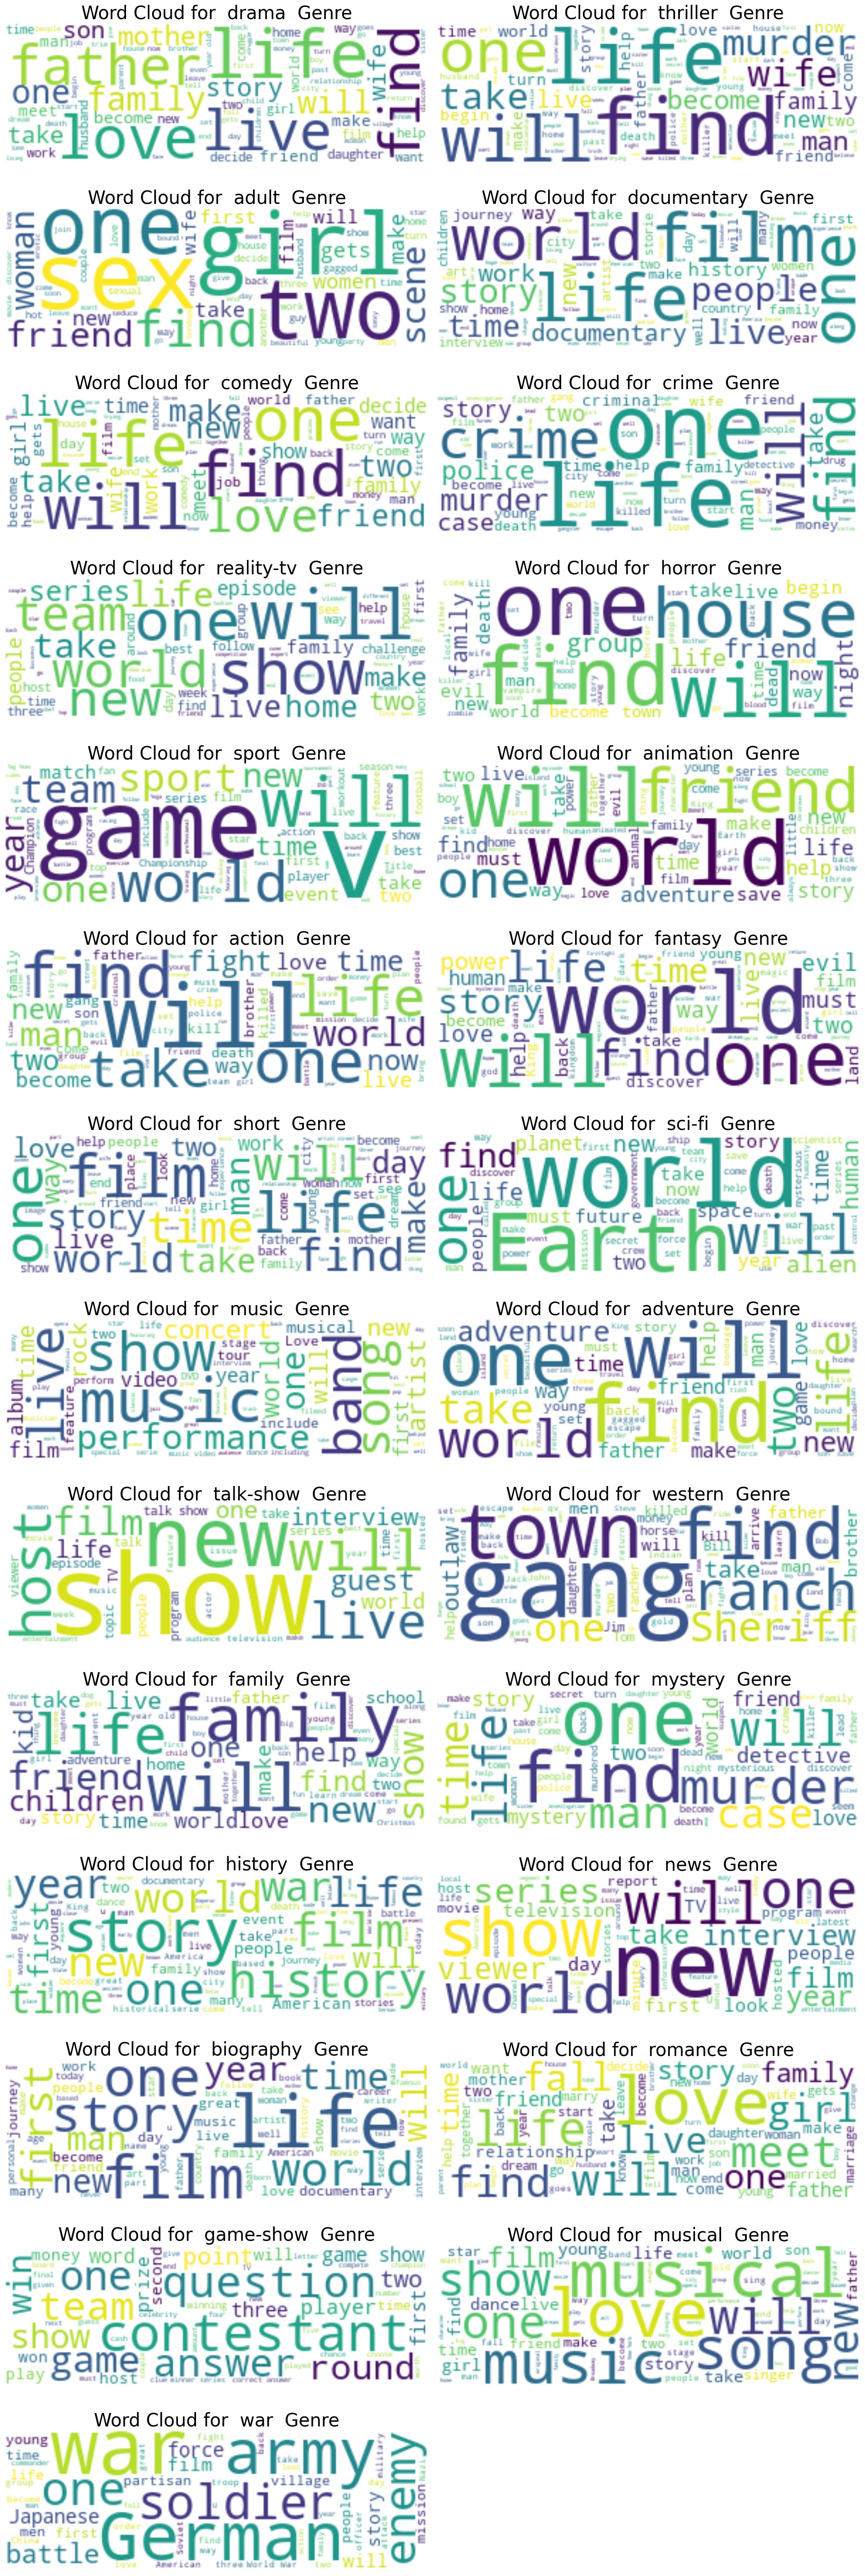

In [14]:

genres = data['Genre'].unique()

plt.figure(figsize=(20, 60))

for i, genre in enumerate(genres, 1):
    plt.subplot(14, 2, i)
    text_subset = " ".join(list(data[data["Genre"] == genre]['Description']))
    wordcloud = WordCloud(max_words=300, width=300, height=100, background_color='white').generate(text_subset)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {genre} Genre',fontsize=30)
    plt.axis('off')

    
plt.tight_layout()
plt.show()

In [15]:
data = data.drop(["Title","Id"] , axis = 1) # will drop column 
data.head()

Genre                                        Description  \
0      drama    Listening in to a conversation between his do...   
1   thriller    A brother and sister with a past incestuous r...   
2      adult    As the bus empties the students for their fie...   
3      drama    To help their unemployed father make ends mee...   
4      drama    The film's title refers not only to the un-re...   

                                  Despcription_clean  
0  listening conversation doctor parents 10yearol...  
1  brother sister past incestuous relationship cu...  
2  bus empties students field trip museum natural...  
3  help unemployed father make ends meet edith tw...  
4  films title refers unrecovered bodies ground z...

## Encoding 

In [16]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Genre_encoded'] = label_encoder.fit_transform(data['Genre'])
data['Genre_encoded']

class_names= list(label_encoder.classes_)
class_names  

[' action ',
 ' adult ',
 ' adventure ',
 ' animation ',
 ' biography ',
 ' comedy ',
 ' crime ',
 ' documentary ',
 ' drama ',
 ' family ',
 ' fantasy ',
 ' game-show ',
 ' history ',
 ' horror ',
 ' music ',
 ' musical ',
 ' mystery ',
 ' news ',
 ' reality-tv ',
 ' romance ',
 ' sci-fi ',
 ' short ',
 ' sport ',
 ' talk-show ',
 ' thriller ',
 ' war ',
 ' western ']

In [17]:
data.head()

Genre                                        Description  \
0      drama    Listening in to a conversation between his do...   
1   thriller    A brother and sister with a past incestuous r...   
2      adult    As the bus empties the students for their fie...   
3      drama    To help their unemployed father make ends mee...   
4      drama    The film's title refers not only to the un-re...   

                                  Despcription_clean  Genre_encoded  
0  listening conversation doctor parents 10yearol...              8  
1  brother sister past incestuous relationship cu...             24  
2  bus empties students field trip museum natural...              1  
3  help unemployed father make ends meet edith tw...              8  
4  films title refers unrecovered bodies ground z...              8

## Train Test Split 

In [18]:
## Split the data
x = data["Despcription_clean"]
y = data["Genre"]

x_train ,x_test ,y_train ,y_test = train_test_split(x ,y ,test_size = 0.5)

In [19]:
vectorize = CountVectorizer()
x_train1 = vectorize.fit_transform(x_train)
x_test1 =  vectorize.transform(x_test)

## Multinomial Naive Bayes 

In [20]:
mnb = MultinomialNB()
mnb.fit(x_train1 ,y_train)
print("Model Score on Training data",mnb.score(x_train1 ,y_train))
print("Model Score on Training data",mnb.score(x_test1 ,y_test))
y_pred = mnb.predict(x_test1)
print(classification_report(y_pred ,y_test))


Model Score on Training data 0.636670540705075
Model Score on Training data 0.5246923829025771


C:\Users\rehan\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rehan\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

      action        0.04      0.62      0.07        76
       adult        0.02      0.57      0.04        21
   adventure        0.06      0.54      0.11        87
   animation        0.00      0.00      0.00         0
   biography        0.00      0.00      0.00         6
      comedy        0.43      0.54      0.48      6157
       crime        0.00      0.00      0.00         0
 documentary        0.90      0.57      0.70     20783
       drama        0.83      0.46      0.59     24615
      family        0.00      0.60      0.01         5
     fantasy        0.00      0.00      0.00        14
   game-show        0.18      0.97      0.30        33
     history        0.00      0.00      0.00         0
      horror        0.26      0.76      0.39       775
       music        0.05      0.88      0.10        43
     musical        0.00      1.00      0.01         1
     mystery        0.00      0.00      0.00         0
        n

C:\Users\rehan\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0)  # You can adjust the kernel and C parameter as needed

# Fit the SVM model to the training data
svm_classifier.fit(x_train1, y_train)

# Print the model's score on the training and test data
print("Model Score on Training data:", svm_classifier.score(x_train1, y_train))
print("Model Score on Test data:", svm_classifier.score(x_test1, y_test))

# Make predictions using the SVM model
y_pred_svm = svm_classifier.predict(x_test1)

# Print classification report
print(classification_report(y_pred_svm, y_test))